<a href="https://colab.research.google.com/github/Petrichoeur/Neural_Net_from_scratch/blob/master/Perceptron_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WARNING : 

 If you use this notebook on google collab, don't run it all . google collab is slow to update all the content so , first run the Generating  image from graph algorithm , wait a little till the content is available and then launch the "make video" algorithm . 

In [0]:
import numpy as np # This is the main framework we will use 
from matplotlib import pyplot as plt   
 # install graphviz For making Video for non-static vizualisation ( if you're not on collab) 
    # !pip install graphviz
from graphviz import Graph , Digraph
import scipy.stats   
from base64 import b64encode # For display the video made later 
from sklearn.model_selection import train_test_split
# If you are using this notebook localy and not on collab, make sure you have Ffmpeg instaled , by doing : 
            # ffmpeg --version  
            # if nothing  : sudo apt-get install ffmpeg (Linux only, i don't know the way for windows but you can google the issue)
 # Usefull for spitting and shuffling the data
 # f1_score will be use but accuracy is also a good way of evaluate a classification.F1 score is more discriminating

from IPython.display import HTML # For seeing vid inside the jupyter notebook.

In [0]:
def classif(x): # Heavyside activation function with use of bias .
    if x >  0 :
        return 1 
    if x <= 0  :
        return -1 
def perceptron_train_weights(X, Y,learning_rate=1,epochs=10):
    weights = np.zeros(len(X[0])) # Initialization of the weights 
    for t in range(epochs):
        for i, input_ in enumerate(X):
            if (np.dot(input_, weights)*Y[i]) <= 0:
                weights= weights + learning_rate*input_*Y[i] # Update of weights with Hebb's rule. 
    return weights # Return the weights vector 

def perceptron_predict(X, Y,learning_rate=1,epochs=1,w=False):   
    weight=perceptron_train_weights(X, Y,learning_rate,epochs) # We get the weights
    Y_dot=[]

    for i, x in enumerate(X):
      Y_dot.append(np.dot(X[i], weight)) # we get the weights multiply by inputs
      Y_hat=[ classif(val) for val in Y_dot] # The prediction of the perceptron
    if w == True : 
        return Y_hat,weight  
    return Y_hat 

def score(x_test,y_test,weights): # Function to get the score of the prediction based on weights.
    Y_hat_score=[]
    for i, val in enumerate(x_test):
        Y_hat_score.append(np.dot(val, weights)) 
  
    y_pred=[ classif(val) for val in Y_hat_score]
    return f1_score(y_pred,y_test) 


# Fonction pour récupérer le jeu de données initial 
def create_norm(N,dim,distance,random=True,to_train=True): 
    if random == False : # To have always the sames values if you want to 
        np.random.seed(0) 
    x1=np.random.randn(N,dim) # We make two random gaussian (N(0,1) distributions )
    x2=np.random.randn(N,dim)  
    x1[:,2]=1     # We use it for the bias. 
    x2[:,2]=1 
    x2[:,0]+=distance  # Distance beetween the two distribution. 
                        # the second distribution has a different mean . Here x2 follow N(distance,1) 
                            # Usefull for modulate the separability of space
    X=np.concatenate((x1,x2),axis=0)   
    y=np.array([1]*N+[-1]*N)  # The label are [-1,1], it's the more efficient way for labelize the output with a perceptron( with Heavy_side activation)
    if to_train == True : 
        return X,y  # For just getting the entire data set and the output labels
    else : 
        return x1,x2,X,y # For getting all ( usefull for vizualisation ) 




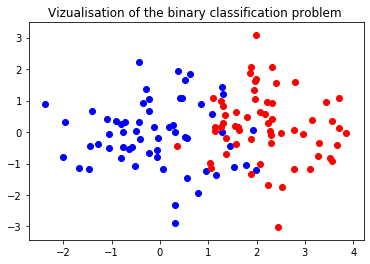

In [6]:
N=60 # Number of element in each distribution , the total number of the dataset is N*2
dim=3 # We make 3 dimensionnal array, 2 for x and y axis and the third for the bias .
distance = 2 # We use 3.5 for the distance beetween distribution because we know that most of the value of a gaussian distribution
             # Like N(mu,sigma) will be in  [mu-3*sigma,mu +3*sigma ] and we want the two distribution almost separable.
x1,x2,X,y = create_norm(N,dim,distance,to_train=False) # 
plt.scatter(x1[:,0],x1[:,1],color='blue')
plt.scatter(x2[:,0],x2[:,1],color='red') 
plt.title('Vizualisation of the binary classification problem ')
plt.show()   
# Vizualisation of the two distributions.

In [0]:
epochs = 3 # Number of iteration make 
learning_rate=1 
weights = np.zeros(len(X[0])) # We initialize the weights
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1) # On utilise la fonction train test split de sklearn 
                                                                # Pour effectuer un melange des données 
                                                                # On pourra utiliser le test de set plus tard pour evaluer 
                                                                # la viabilité du modèle.

for epo in range(epochs):
    update_iter=0
    for i, x in enumerate(x_train):
        if (np.dot(x, weights)*y_train[i]) <= 0:
            weights= weights + learning_rate*x*y_train[i]
            update_iter=i   # We memorize the iteration where the updates are made 
        test= Graph(format='png')  # We create a graph 
        # We create a graph which has the structure of a perceptron. 
        # And we use f-string for showing values of each parameter 
        test.graph_attr["rankdir"] = "LR"   
        test.edge(f'X1= {x[0]:.4f}','Artificial Neuron',label=f'W1={weights[0]:.4f}') 
        test.edge(f'X2= {x[1]:.4f}','Artificial Neuron',label=f'W2={weights[1]:.4f}')
        test.edge(f'Bias= {x[2]:.4f}','Artificial Neuron',label=f'W3={weights[2]:.4f}') 
        test.node(f'Training of a Perceptron epoch={epo+1} \n update at iter = {update_iter} \n update progress = {i/len(x_train):.2f} %') 
        # We get the summation for the activation function 
        sum_w=np.dot(x, weights) 
        activate=sum_w*y[i]
        color_f ='' 
        # We colorize the node of the activation depending on the activation of the neuron when training.
        if activate > 0 : 
            color_f = 'green'
        else :
            color_f ='red' 
        prediction=classif(activate)
        test.edge(f'Artificial Neuron',f'Sum = {sum_w:.3f}') 
        test.node('Activation function',color=color_f,style='filled')
        test.edge(f'Sum = {sum_w:.3f}','Activation function') 
        test.node('Prediction',label=f'Prediction : {prediction} True value : {y_train[i]}',color=color_f,style='filled') 
        test.edge('Activation function',f'Prediction')
        # We create the .png 
        test.render(f'perceptron_{epo}_{i}') 
    

In [6]:

1/0

ZeroDivisionError: ignored

In [0]:
import os 
import cv2  
from PIL import Image  
import argparse 
from google.colab.patches import cv2_imshow
image_list=[]
for epo in range(epochs):
    for k in range(len(x_train)): 
        image_list.append(f'perceptron_{epo}_{k}.png')


frame = cv2.imread(image_list[0])
height, width, layers = frame.shape 
video_name = 'Perceptron_video.avi' 

fourcc = cv2.VideoWriter_fourcc(*'mp4v') # Be sure to use lower case
out = cv2.VideoWriter(video_name, fourcc, 4.0, (width, height)) 

for image in image_list:
    frame = cv2.imread(image)

    out.write(frame) # Write out frame to video

# Release everything if job is finished
out.release()
cv2.destroyAllWindows()

324

In [13]:
324/4



81.0